In [30]:
import numpy as np

data = np.loadtxt('../../datasets/Udacity/linear01.csv', delimiter = ',')

[array([0., 0.]), array([0.12341158, 0.2049234 ]), array([0.07713629, 0.37119546]), array([0.13991386, 0.52422169]), array([0.14017334, 0.66281191]), array([0.15514756, 0.77699134]), array([0.15039492, 0.88136108]), array([0.19857266, 0.99942708]), array([0.26441435, 1.1012103 ]), array([0.284643 , 1.1749923]), array([0.31173667, 1.2578259 ]), array([0.33257141, 1.29953887]), array([0.37719351, 1.35343161]), array([0.38658478, 1.41235015]), array([0.37639877, 1.48358489]), array([0.40449639, 1.51995864]), array([0.38520041, 1.57841031]), array([0.41715857, 1.63043345]), array([0.41430519, 1.66112077]), array([0.39842119, 1.68996465]), array([0.39392107, 1.71004375]), array([0.42072954, 1.72423628]), array([0.42726705, 1.74816547]), array([0.4565849 , 1.77112757]), array([0.45097337, 1.78769497]), array([0.4477919 , 1.82878844])]


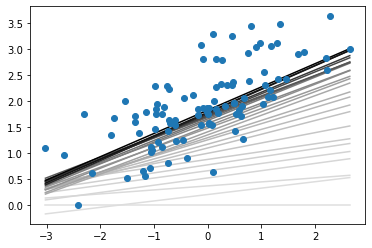

In [43]:
import numpy as np
# Setting a random seed, feel free to change it and see different solutions.
np.random.seed(42)


# TODO: Fill in code in the function below to implement a gradient descent
# step for linear regression, following a squared error rule. See the docstring
# for parameters and returned variables.
def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    
    # Fill in code
    y_pred = np.matmul(X, W) + b
    error = y-y_pred   
    W_new = W + (np.matmul(error, X)) * learn_rate
    b_new = b + (error.sum()) * learn_rate
    
    return W_new, b_new


# The parts of the script below will be run when you press the "Test Run"
# button. The gradient descent step will be performed multiple times on
# the provided dataset, and the returned list of regression coefficients
# will be plotted.
def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef


if __name__ == "__main__":
    # perform gradient descent
    #data = np.loadtxt('data.csv', delimiter = ',')
    X = data[:,:-1]
    y = data[:,-1]
    regression_coef = miniBatchGD(X, y)
    print(regression_coef)
    # plot the results
    import matplotlib.pyplot as plt
    
    plt.figure()
    X_min = X.min()
    X_max = X.max()
    counter = len(regression_coef)
    for W, b in regression_coef:
        counter -= 1
        color = [1 - 0.92 ** counter for _ in range(3)]
        plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
    plt.scatter(X, y, zorder = 3)
    plt.show()

In [47]:
a = np.array([1,2,3])
b = np.array([1,2,3])
c = np.matmul(a,b.T)
print(c)
print(np.dot(a,b.T))

14
14


# Lasso Regularization

In [53]:
# Lasso Regularization
from sklearn.linear_model import Lasso
lasso_data = np.loadtxt('../../datasets/Udacity/lasso.csv', delimiter = ',')
print(lasso_data)

[[ 1.256640e+00  2.049780e+00 -6.236400e+00  4.719260e+00 -4.269310e+00
   2.059000e-01  1.231798e+01]
 [-3.890120e+00 -3.751100e-01  6.149790e+00  4.945850e+00 -3.578440e+00
   6.400000e-03  2.367628e+01]
 [ 5.097840e+00  9.812000e-01 -2.993900e-01  5.858050e+00  2.829700e-01
  -2.062600e-01 -1.534590e+00]
 [ 3.903400e-01 -3.068610e+00 -5.634880e+00  6.439410e+00  3.925600e-01
  -7.084000e-02 -2.468670e+01]
 [ 5.847270e+00 -1.592200e-01  1.141246e+01  7.521650e+00  1.698860e+00
   2.902200e-01  1.754122e+01]
 [-2.862020e+00 -8.433700e-01 -1.081650e+00  6.711500e-01 -2.489110e+00
   5.232800e-01  9.397890e+00]
 [-7.093280e+00 -7.233000e-02  6.766320e+00  1.306072e+01  1.287600e-01
  -1.048000e-02  1.173565e+01]
 [-7.176140e+00  6.287500e-01 -2.899240e+00 -5.214580e+00 -2.703440e+00
  -2.203500e-01  4.424820e+00]
 [ 8.674300e+00  2.099330e+00 -1.123591e+01 -5.995320e+00 -2.797700e+00
  -8.710000e-02 -5.946150e+00]
 [-6.033240e+00 -4.167240e+00  2.420630e+00 -3.618270e+00  1.968150e+00
 

In [54]:
X = lasso_data[:,:6]
Y = lasso_data[:,-1]

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,Y)
lasso_reg.coef_
    

array([-0.        ,  2.8194267 ,  2.00228614, -0.07137333, -3.96866357,
        5.76487076])

# Mean Absolute Error

In [85]:
input = [(2, -2), (5, 6), (-4, -4), (-7, 1), (8, 14)]

def getX(tuple):
    return tuple[0]
def getY(tuple):
    return tuple[1]

x = np.array(list(map(getX, input)))
print(x)
print(y)
y = np.array(list(map(getY, input)))

def mae(X, y, w, b):
    y_pred = w*x + b
    error = np.mean(np.abs(y-y_pred))
    return error 

def mse(X, y, w, b):
    y_pred = w*x + b
    error = np.mean((y-y_pred)**2)
    return error 

mae = mae(x,y,1.2,2)
print(f'mae: {mae}')
mse = mse(x,y,1.2,2)
print(f'mse: {mse}')


    

[ 2  5 -4 -7  8]
[-2  6 -4  1 14]
mae: 3.88
mse: 21.384000000000004


# Mean Square Error